In [2]:
from imageio import imread
import matplotlib.pyplot as plt
import numpy as np
import math
import pickle
from math import floor, ceil

In [3]:
a = np.arange(9).reshape(3,3)
print(a.T)

[[0 3 6]
 [1 4 7]
 [2 5 8]]


In [4]:
image = np.zeros((50,50))

In [5]:
image_corner = np.array(
        [
            [[0],[0]],
            [[0],[image.shape[1]-1]],
            [[image.shape[0]-1],[0]],
            [[image.shape[0]-1],[image.shape[1]-1]]
        ]
    )

In [6]:
print(image_corner[3])

[[49]
 [49]]


In [7]:
print(image_corner.shape)

(4, 2, 1)


In [1]:
min(5,3)

3

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
a = plt.imread('shelf.jpg')

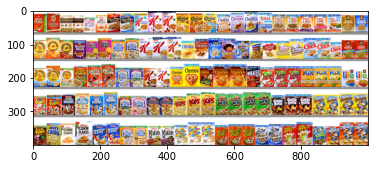

In [4]:
plt.imshow(a)

In [5]:
def gaussian2d(filter_size=7, sig=1.0):
    """
    Creates 2D Gaussian kernel with side length `filter_size` and a sigma of `sig`.
    """
    ax = np.arange(-filter_size // 2 + 1., filter_size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel / np.sum(kernel)

In [8]:
g = gaussian2d(3,0.5)
x = np.array([[-0.5,0,0.5]])
print(g)
print(x)

[[0.01134374 0.08381951 0.01134374]
 [0.08381951 0.61934703 0.08381951]
 [0.01134374 0.08381951 0.01134374]]
[[-0.5  0.   0.5]]


In [10]:
def zero_pad(image, pad_top, pad_down, pad_left, pad_right):
    """ Zero-pad an image.

    Ex: a 1x1 image [[1]] with pad_top = 1, pad_down = 1, pad_left = 2, pad_right = 2 becomes:

        [[0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0]]         of shape (3, 5)

    Args:
        image: numpy array of shape (H, W)
        pad_left: width of the zero padding to the left of the first column
        pad_right: width of the zero padding to the right of the last column
        pad_top: height of the zero padding above the first row
        pad_down: height of the zero padding below the last row

    Returns:
        out: numpy array of shape (H + pad_top + pad_down, W + pad_left + pad_right)
    """
    """ 
    ==========
    YOUR CODE HERE
    ========== 
    """
    H = image.shape[0]
    W = image.shape[1]
    out = np.zeros([H+pad_top+pad_down, W+pad_left+pad_right])
    
    out[pad_top:pad_top+H, pad_left:pad_left+W] = image

    return out

def conv(image, kernel):
    """ An efficient implementation of a convolution filter.

    This function uses element-wise multiplication and np.sum()
    to efficiently compute a weighted sum of the neighborhood at each
    pixel.

    Hints:
        - Use the zero_pad function you implemented above
        - You should need at most two nested for-loops
        - You may find np.flip() and np.sum() useful
        - You need to handle both odd and even kernel size

    Args:
        image: numpy array of shape (Hi, Wi)
        kernel: numpy array of shape (Hk, Wk)

    Returns:
        out: numpy array of shape (Hi, Wi)
    """
    Hi, Wi = image.shape
    Hk, Wk = kernel.shape
    out = np.zeros((Hi, Wi))
    
    pad_top = Hk//2
    pad_bottom = Hk- pad_top -1
    pad_left = Wk//2
    pad_right = Wk - pad_left - 1
    
    image = zero_pad(image, pad_top, pad_bottom, pad_left, pad_right)
    kernel = np.flip(kernel)
    
    
    for i in range(Hi):
        for j in range(Wi):
            out[i][j] = np.sum(image[i:i+Hk,j:j+Wk]*kernel)

    """ ==========
    YOUR CODE HERE
    ========== """
    return out

In [19]:
g = np.array([[1,1,1]
    ,[1,1,1],
     [1,1,1]
    ])

result1 = conv(g,x)
x2 = np.vstack([[0,0,0],x,[0,0,0]])
print(x)
print(x2)
result2 = conv(x2,g)

print(result1)
print(result2)

[[-0.5  0.   0.5]]
[[ 0.   0.   0. ]
 [-0.5  0.   0.5]
 [ 0.   0.   0. ]]
[[-0.5  0.   0.5]
 [-0.5  0.   0.5]
 [-0.5  0.   0.5]]
[[-0.5  0.   0.5]
 [-0.5  0.   0.5]
 [-0.5  0.   0.5]]


In [1]:
a = [1,2,3,4]

In [2]:
a[0:2]

[1, 2]

In [5]:
import numpy as np
a = np.array( [[ 52., 301.],
 [ 65. ,302.],
 [460. ,308.],
 [173., 329.],
 [134. ,321.],
 [274. , 85.],
 [516. ,186.],
 [547. ,435.],
 [ 29. ,311.],
 [297. , 69.],
 [ 20., 310.],
 [336. , 91.],
 [302. ,468.],
 [514. , 79.],
 [ 71. ,383.],
 [334., 150.],
 [298., 164.],
 [270., 156.],
 [552., 334.],
 [114., 338.]])

In [6]:
for i in range(a.shape[0]):
    print(a[i,:])

[ 52. 301.]
[ 65. 302.]
[460. 308.]
[173. 329.]
[134. 321.]
[274.  85.]
[516. 186.]
[547. 435.]
[ 29. 311.]
[297.  69.]
[ 20. 310.]
[336.  91.]
[302. 468.]
[514.  79.]
[ 71. 383.]
[334. 150.]
[298. 164.]
[270. 156.]
[552. 334.]
[114. 338.]


In [7]:
a = [1,2,3,4,5]
print(len(a))

5


In [9]:
crns_sport0 =[[ 52. 301.]
 [ 65. 302.]
 [460. 308.]
 [173. 329.]
 [134. 321.]
 [274.  85.]
 [516. 186.]
 [547. 435.]
 [ 29. 311.]
 [297.  69.]
 [ 20. 310.]
 [336.  91.]
 [302. 468.]
 [514.  79.]
 [ 71. 383.]
 [334. 150.]
 [298. 164.]
 [270. 156.]
 [552. 334.]
 [114. 338.]]
crns_sport1 =[[ 22. 317.]
 [424. 380.]
 [447. 185.]
 [212.  86.]
 [338. 456.]
 [233.  71.]
 [269. 150.]
 [271.  91.]
 [446.  79.]
 [235. 163.]
 [335. 425.]
 [446. 333.]
 [209. 156.]
 [203. 463.]
 [308. 345.]
 [ 26.  43.]
 [ 48. 336.]
 [ 57. 556.]
 [362. 308.]
 [447. 213.]]

SyntaxError: invalid syntax (<ipython-input-9-cb6dfffb9cdf>, line 1)

In [11]:
np.linspace(0xffffff,16,dtype=int)

array([16777215, 16434823, 16092431, 15750039, 15407647, 15065255,
       14722864, 14380472, 14038080, 13695688, 13353296, 13010905,
       12668513, 12326121, 11983729, 11641337, 11298945, 10956554,
       10614162, 10271770,  9929378,  9586986,  9244595,  8902203,
        8559811,  8217419,  7875027,  7532635,  7190244,  6847852,
        6505460,  6163068,  5820676,  5478285,  5135893,  4793501,
        4451109,  4108717,  3766325,  3423934,  3081542,  2739150,
        2396758,  2054366,  1711975,  1369583,  1027191,   684799,
         342407,       16])

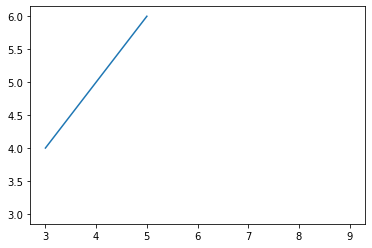

In [18]:
import matplotlib.pyplot as plt

plt.plot((3,5,7,9),(4,6,None,3))

C:\Users\Xin Du\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: setting an array element with a sequence.

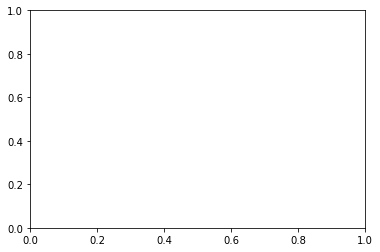

In [24]:
x = [
    [0,0],
    [1,1],
    [2,2],
    [3,3]
]

y =[
    [8,8],
    [7,5],
    None,
    [8,8],
]

for i in range(5):
    plt.plot(x,y)

In [25]:
a = np.array([1,2,3])

In [26]:
list(a)

[1, 2, 3]

In [27]:
list(a).index(2)

1